# Project: Creating Customer Segments

## Getting Started

Dataset contains data on various customers' annual spending amounts of diverse product categories. Our goal is to best describe the variation in the different types of customers that a wholesale distributor interacts with.



In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving customers.csv to customers.csv


In [3]:
# Load the wholesale customers dataset
import io
data = pd.read_csv(io.BytesIO(uploaded["customers.csv"]))
print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))

Wholesale customers dataset has 440 samples with 7 features each.


In [4]:
data

,Unnamed: 0,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,12669,9656,7561,214,2674,1338
1,1,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,435,29703,12051,16027,13135,182,2204
436,436,39228,1431,764,4510,93,2346
437,437,14531,15488,30243,437,14841,1867
438,438,10290,1981,2232,1038,168,2125


In [5]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

## Data Exploration


In [6]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [7]:
# Selecting three random indices 
indices = [56, 273, 434]

# Creating a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4098,29892,26866,2616,17740,1340
1,36817,3045,1493,4802,210,1824
2,16731,3922,7994,688,2371,838


###  Feature Relevance
Finding the correaltion between the features of the dataset

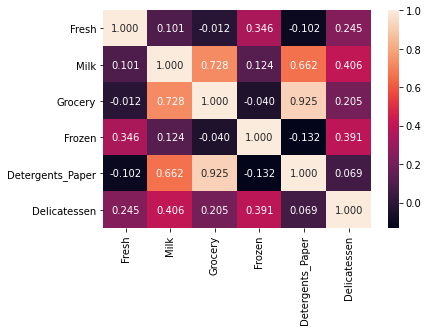

In [8]:
# we can use corr() to get the feature correlations and then visualize them using a heatmap
import seaborn as sns;
sns.heatmap(data.corr(), annot=True, fmt=".3f")

 Visualizing the features distributions using a scatter matrix

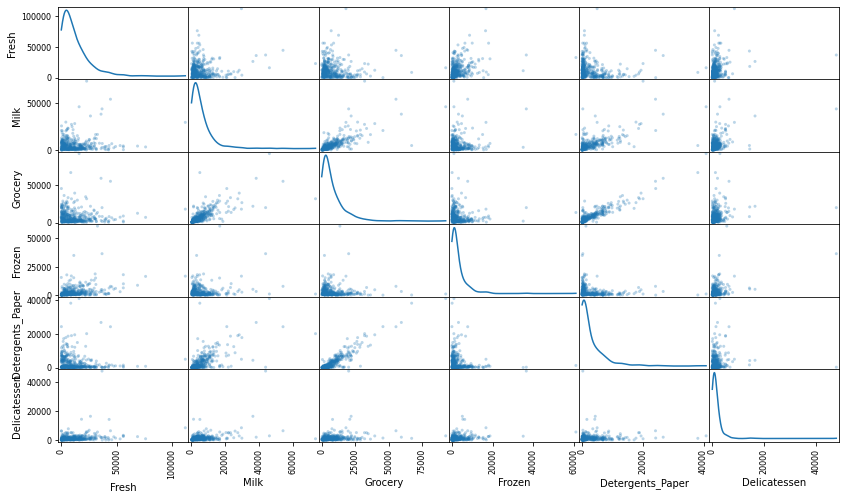

In [9]:
# Producing a scatter matrix for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Data Preprocessing


### Implementation: Feature Scaling
As the data is not normally distributed, mean and median vary significantly (large skew). we need to apply some sort of scaling to the data in order to get it normally distributed.

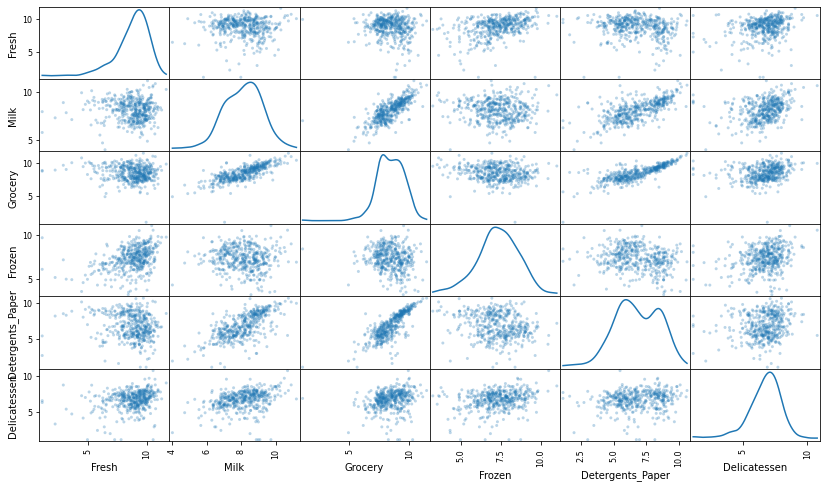

In [10]:
# Scaling the data using the natural logarithm
log_data = np.log(data)

# Scaling the sample data using the natural logarithm
log_samples = np.log(samples)

# Producing a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.318254,10.305346,10.198617,7.869402,9.783577,7.200425
1,10.513715,8.021256,7.308543,8.476788,5.347108,7.508787
2,9.725019,8.274357,8.986447,6.533789,7.771067,6.731018


### Outlier Detection
In order to reduce the skewness, we need to detect the outliers and remove them
We will use Tukey's Method for identfying outliers: An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.



In [12]:
# For each feature find the data points with extreme high or low values (Outliers)
data_points = []
for feature in log_data.keys():
    # Calculating Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculating Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    # detecting the outliers
    data_point = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))] 
    display(data_point)
    data_points += list(data_point.index.values)
# Detecting the outliers(those points which are outliers for more than 1 features)
duplicates = set([x for x in data_points if data_points.count(x) > 1])
outliers  = list(duplicates)

print(outliers)

# Removing the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[128, 65, 66, 75, 154]


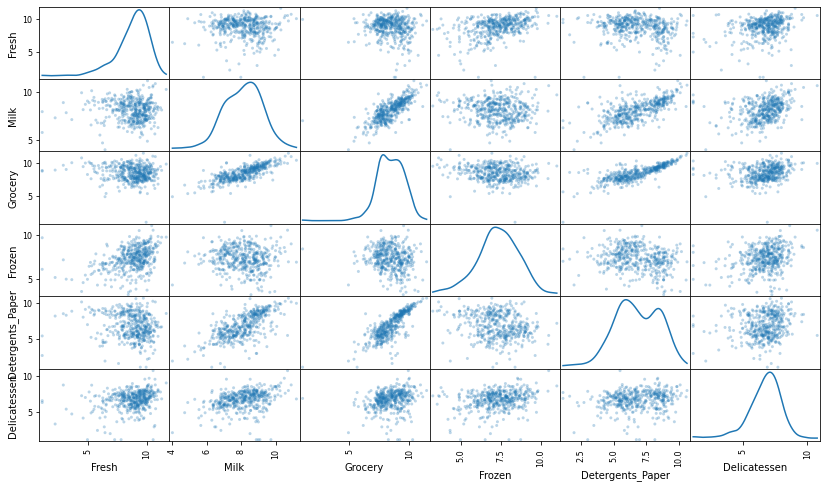

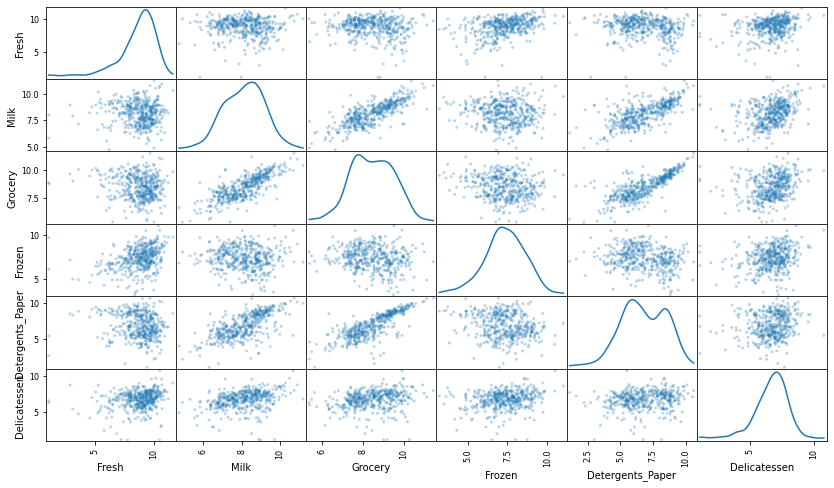

In [13]:
# Plotting the scatter matrix for the log_data and good_data
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/')
import visuals as vs

## Feature Transformation
We will use principal component analysis (PCA) to find the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

PC1 + PC2: 70.68
PC1 to PC4: 93.11


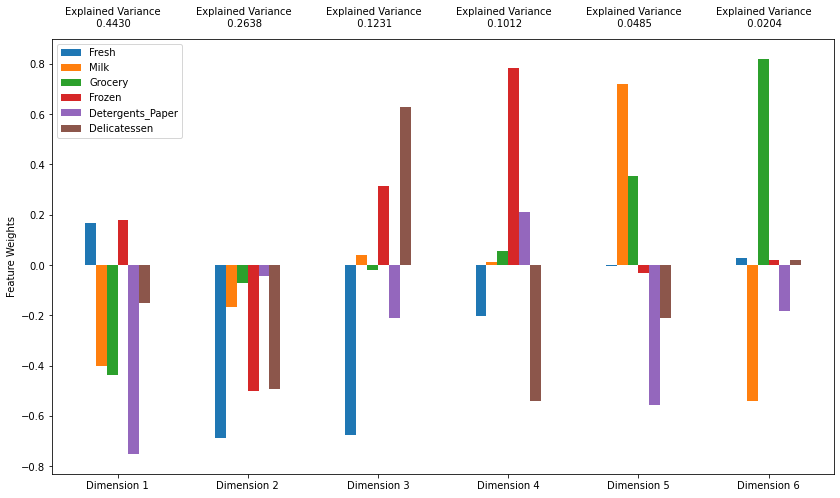

In [16]:
from sklearn.decomposition import PCA

# Applying PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

#Transforming log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generating PCA results plot using the pca_results() function from visuals.py imported above
pca_results = vs.pca_results(good_data, pca)

# Calculating the cumulative variance ratio
cumulative = np.cumsum(pca.explained_variance_ratio_)
print(f"PC1 + PC2: {cumulative[1] * 100:.2f}")
print(f"PC1 to PC4: {cumulative[3] * 100:.2f}")

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.9321,-0.8289,0.2152,0.9953,0.3950,-0.2858
1,2.0144,-2.0165,0.0170,-0.2635,0.1110,-0.5316
2,-1.0055,-0.3825,-1.0855,-0.6019,-0.2346,0.1880


In [18]:
# As it can be seen that the variance explained by the PC1 and PC2 is more than 70%, so we will be transforming the data to 2-D
# Applying PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transforming the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transforming log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Creating a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.9321,-0.8289
1,2.0144,-2.0165
2,-1.0055,-0.3825


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). 

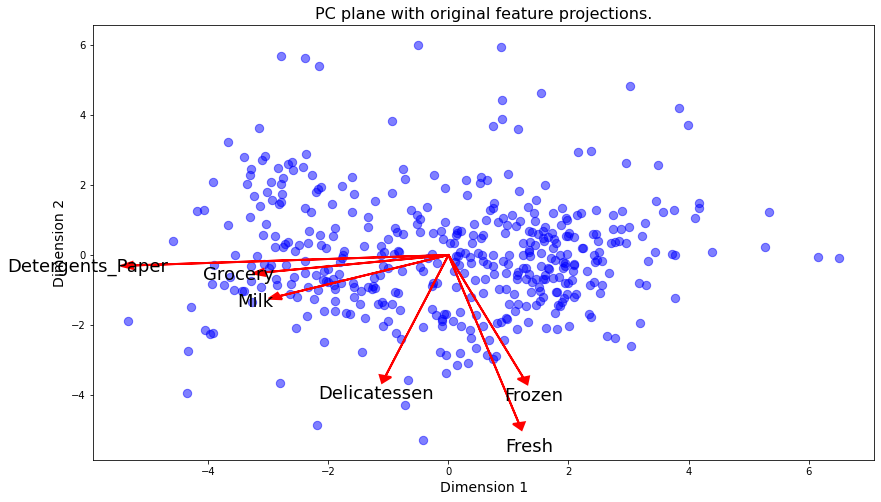

In [20]:
# Creating a biplot using biplot() function from visuals.py imported above
vs.biplot(good_data, reduced_data, pca)

The arrows in above diagram represent the correaltion of original features with the pca components (PC1 and PC2)

## Clustering

We will use Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data.  

### Creating Clusters 
As the no. of clusters are not known, we will be using silhouette score for several cluster numbers

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

n_cluster = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

for c in n_cluster:
  clusterer = GaussianMixture(n_components=c, random_state=0).fit(reduced_data)
  # Predict the cluster for each data point
  preds = clusterer.predict(reduced_data)

  # Finding the cluster centers
  centers = clusterer.means_

  # Predicting the cluster for each transformed sample data point
  sample_preds = clusterer.predict(pca_samples)

  # Calculating the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(reduced_data, preds)

  print(f"Clusters: {c} - score: {score:.3f}")

Clusters: 2 - score: 0.422
Clusters: 3 - score: 0.376
Clusters: 4 - score: 0.279
Clusters: 5 - score: 0.204
Clusters: 6 - score: 0.280
Clusters: 7 - score: 0.264
Clusters: 8 - score: 0.325
Clusters: 9 - score: 0.331
Clusters: 10 - score: 0.315
Clusters: 15 - score: 0.285
Clusters: 20 - score: 0.262


The best score is 0.422 for 2 clusters.

In [24]:
clusterer = GaussianMixture(n_components=2, random_state=0).fit(reduced_data)
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Finding the cluster centers
centers = clusterer.means_

# Predicting the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

### Cluster Visualization


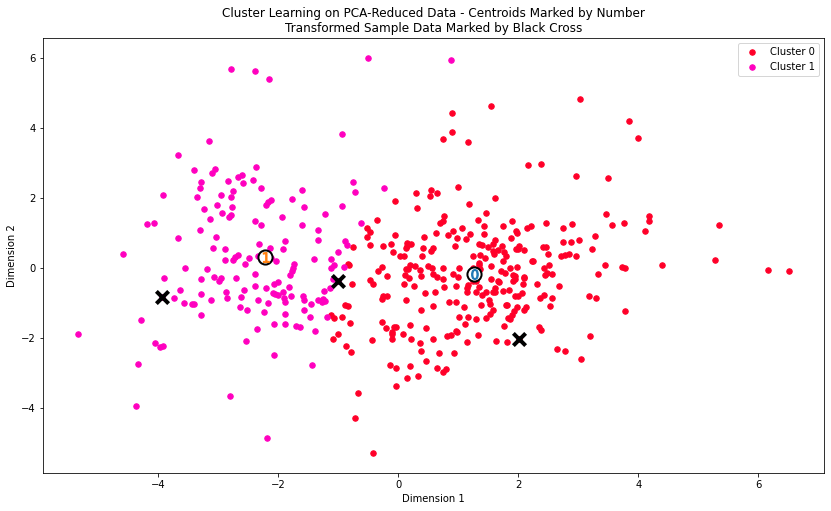

In [25]:
# Display the results of the clustering from implementation
# Using cluster_results from the visuals.py imported above
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Data Recovery

 - Applying the inverse transform to 'centers' using 'pca.inverse_transform' and assigning the new centers to 'log_centers'.
 - Applying the inverse function of 'np.log' to 'log_centers' using 'np.exp' and assigning the true centers to 'true_centers'.


In [26]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


In [27]:
# Predicting the cluster for each sample data point
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1
